In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/climate_nasa.csv')

In [ ]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Handle missing values
data.fillna(0, inplace=True)

In [ ]:
# Feature Engineering
X = data[['likesCount', 'commentsCount']]
y = data['likesCount'] + data['commentsCount']  # Example target variable for trend analysis

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

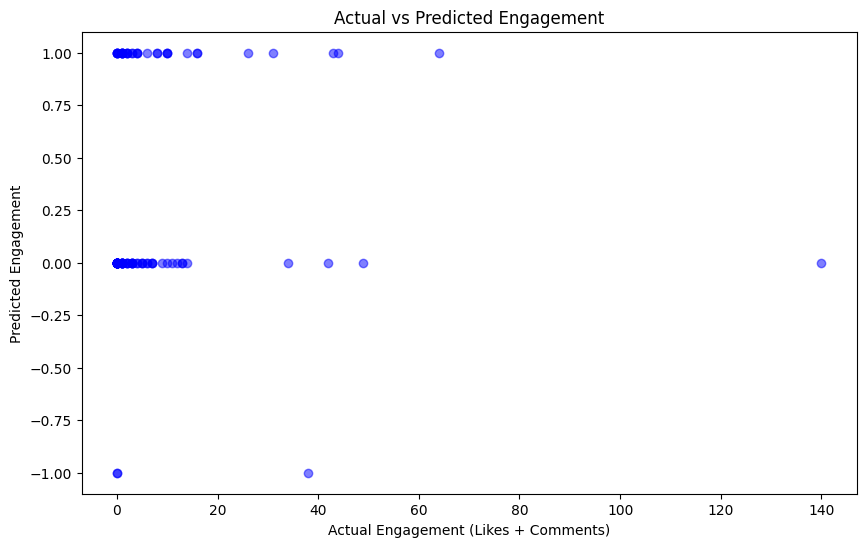

In [ ]:
# Visualization of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Engagement (Likes + Comments)')
plt.ylabel('Predicted Engagement')
plt.title('Actual vs Predicted Engagement')
plt.show()

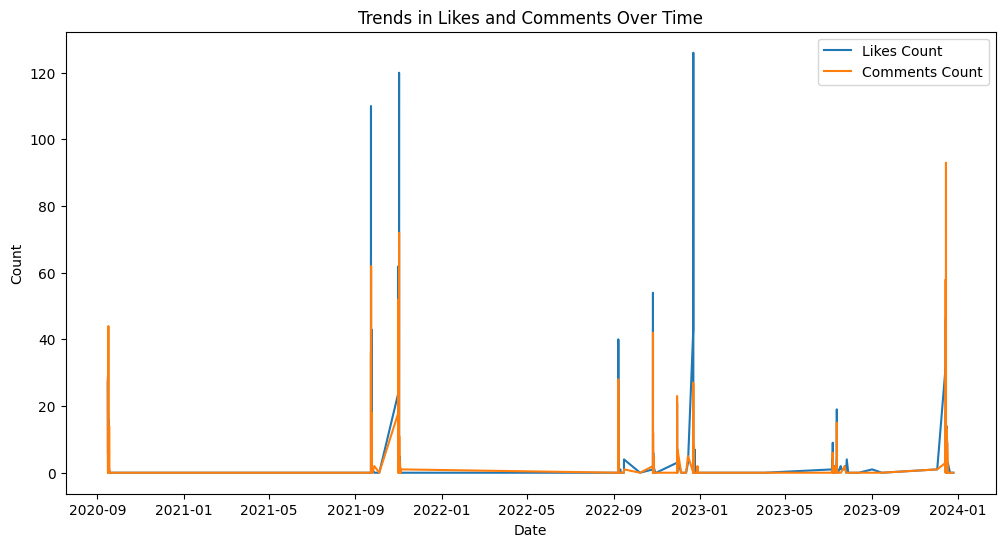

In [ ]:
# Time Series Trend Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'], y=data['likesCount'], label='Likes Count')
sns.lineplot(x=data['date'], y=data['commentsCount'], label='Comments Count')
plt.title('Trends in Likes and Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

<ipython-input-15-a461bc602e82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='coolwarm')


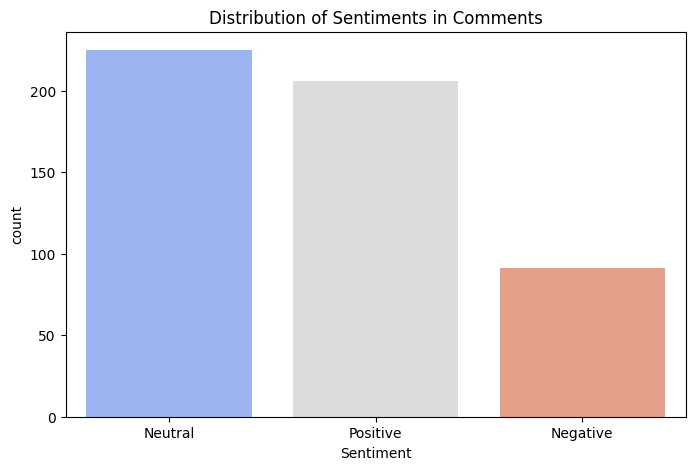

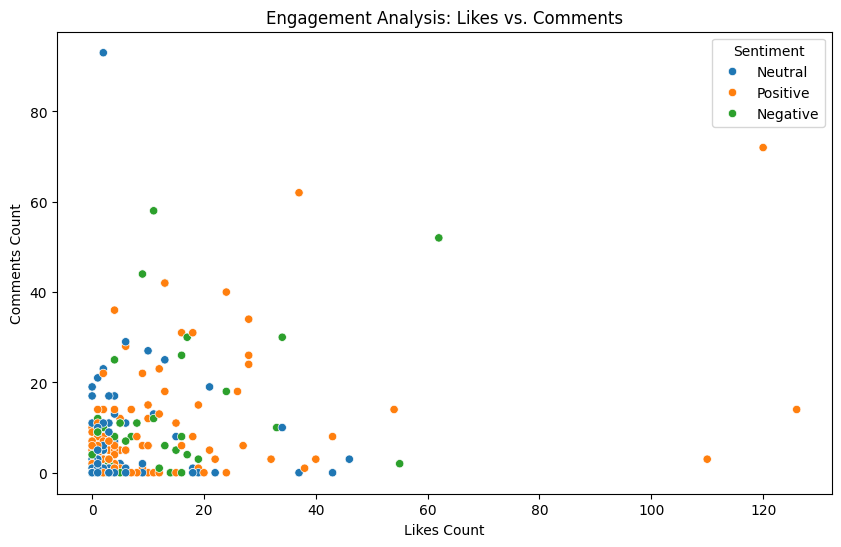

In [ ]:
# Engagement Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likesCount', y='commentsCount', hue='Sentiment', data=data)
plt.title('Engagement Analysis: Likes vs. Comments')
plt.xlabel('Likes Count')
plt.ylabel('Comments Count')
plt.show()